In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version  -  1.20.1
pandas version -  1.2.4


- pie : 카테고리값의 상대적인 비교

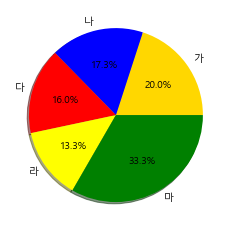

In [13]:
labels = ['가','나','다','라','마']
datas = [15,13,12,10,25]
colors = ['gold','blue','red','yellow','green']

plt.figure()

plt.pie(datas , labels = labels, colors = colors, shadow = True, autopct = '%1.1f%%')
# autopct = '%1.1f%%' 값의 형식 지정

plt.show()
plt.close()

In [19]:
dataset = pd.read_csv('./data/auto-mpg.csv' , header = None )
dataset.columns = ['mpg','cyl','disp','horsepower','weight','acc','year','origin','name']
dataset['cnt'] = 1
dataset

,mpg,cyl,disp,horsepower,weight,acc,year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [27]:
print('제조국으로 그룹 지어서 라벨 인덱스 변경')
origin_grp_df = dataset.groupby('origin').sum()
origin_grp_df.index = ['USA','EU','KOR']
origin_grp_df

제조국으로 그룹 지어서 라벨 인덱스 변경


,mpg,cyl,disp,weight,acc,year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
KOR,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [31]:
print('cyl 그룹 지어 라벨 인덱스 변경')
cyl_grp_df = dataset.groupby('cyl').sum()
cyl_grp_df.index = ['cyl3','cyl4','cyl5','cyl6','cyl8']
cyl_grp_df

cyl 그룹 지어 라벨 인덱스 변경


,mpg,disp,weight,acc,year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


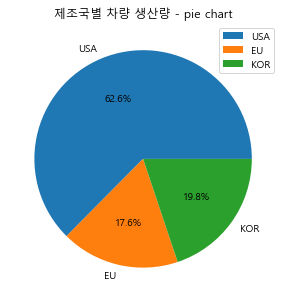

In [48]:
plt.figure(figsize=(5,5))

plt.pie(origin_grp_df['cnt'] , labels = origin_grp_df.index, autopct = '%1.1f%%')
# autopct = '%1.1f%%' 값의 형식 지정

plt.title('제조국별 차량 생산량 - pie chart')
plt.legend(labels = origin_grp_df.index, loc = 'best')

plt.show()
plt.close()

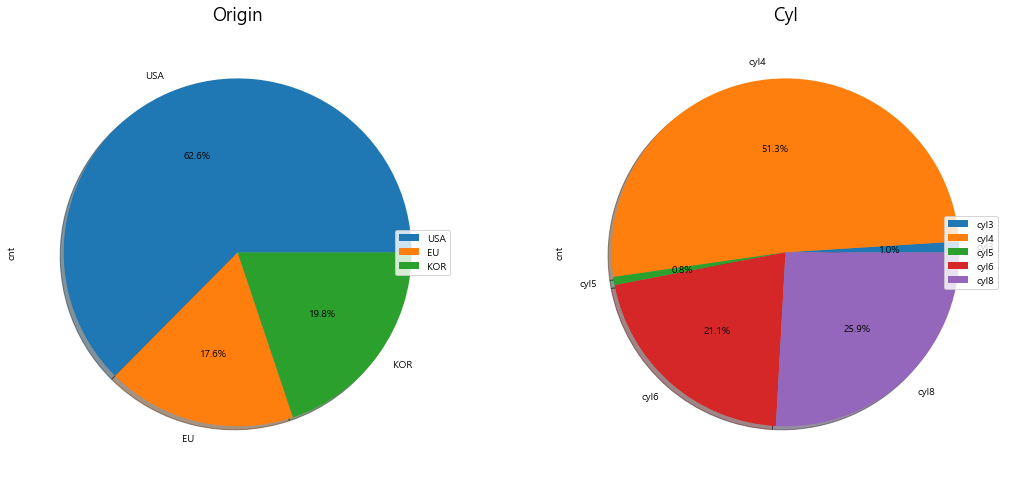

In [72]:
# 제조국과 실린더별 파이차트 구현
# 조건 subplot (1,2) 구현

f, ax = plt.subplots(1, 2, figsize = (18, 8))

origin_grp_df['cnt'].plot.pie(autopct = '%1.1f%%' , ax =ax[0], shadow = True)
ax[0].set_title('Origin', y = 1.02, fontsize = 18)
ax[0].legend(loc = 'right')

cyl_grp_df['cnt'].plot.pie(autopct = '%1.1f%%' , ax =ax[1], shadow = True)
ax[1].set_title('Cyl', y = 1.02, fontsize = 18)
ax[1].legend(loc = 'right')

- histogram : 구간에 대한 데이터 집계
- 변수가 하나인 단변수 데이터의 빈도수를 시각화할 때 사용한다